In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target



In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Initialize logistic regression model
log_reg = LogisticRegression()



In [7]:
# Train the model
log_reg.fit(X_train, y_train)



LogisticRegression()

In [8]:
# Predict probabilities on the test set
probs = log_reg.predict_proba(X_test)[:, 1]  # probability of belonging to class 1 (malignant)



In [9]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)



In [12]:
# Calculate AUC
roc_auc = auc(fpr, tpr)

roc_auc

0.9966196355085244

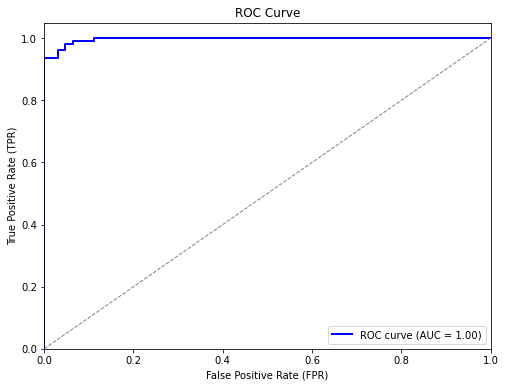

In [11]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
